# Exponential distribution: example

In [7]:
rm(list = ls())

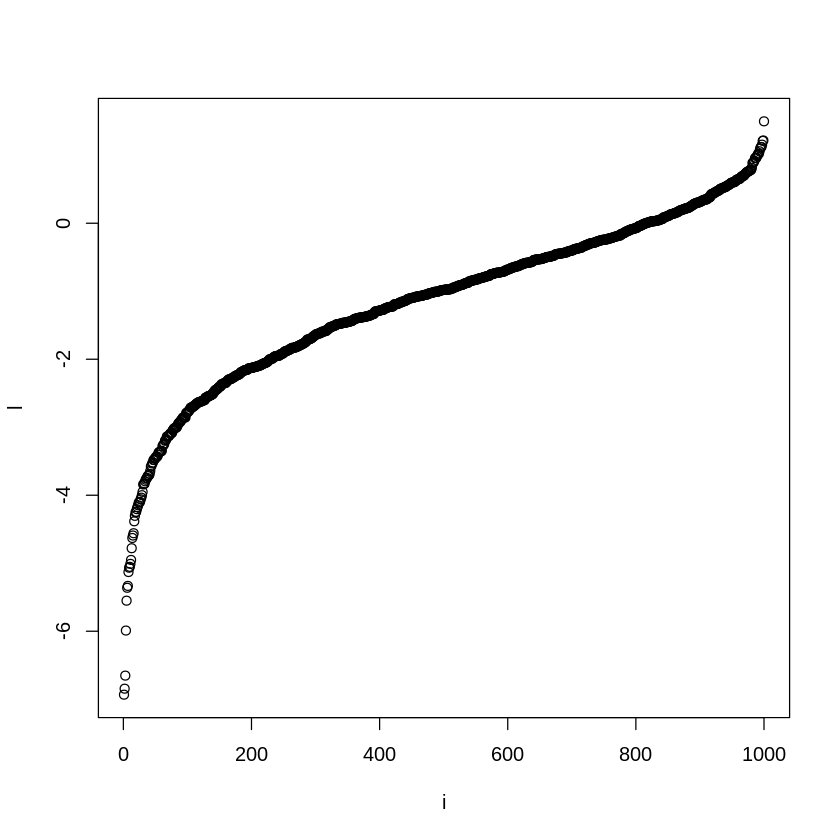

In [33]:
# exponential
ex = function(x, a){
    return(a*exp(-a*x))
}

# likelihood exp
ex.like = function(x, a){
    n = length(x)
    return(a^n * exp(-a*(sum(x))))
}

# get some data
# geting data from the distribution its self doesn't work well.
# the estimate does not produce anything close to the 1.8 a value used
# the model line also doesnt seem to fit well.
df = runif(n = 10000, min = 1, max = 10)
data = ex(df, 1.8)

# sampling from the inbuilt r distribution we get an estimate very close to 1.8 
# which looks good. But the model line doesn't fit the data very well.
# confused.
data = rexp(1000, 1.8)
i = seq(1, length(data), by=1)
l = log(sort(-data))


plot(i, l)


#std = sort(data)
#plot(log(std$data), std$index)

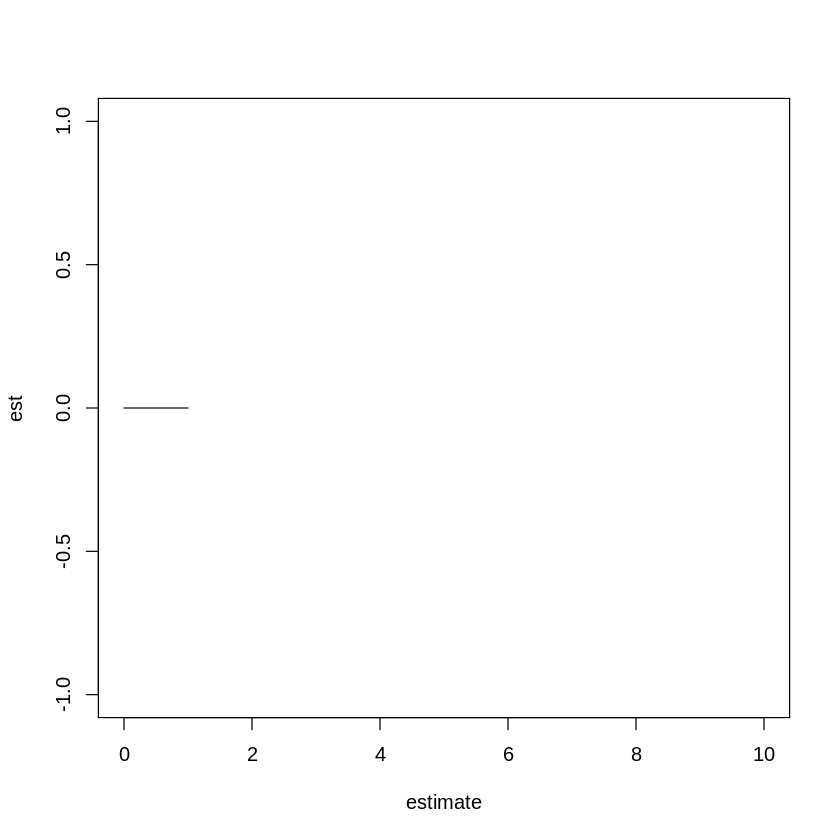

In [37]:
estimate = seq(0, 10, 0.1)
est = ex.like(std, estimate)
plot(estimate, est, type = "l")
mle = data.frame(estimate, est)
maxmle = mle$estimate[mle$est == max(mle$est)]
abline(v = maxmle, col = "red")

[1] 1.81361

[1] 1.8136

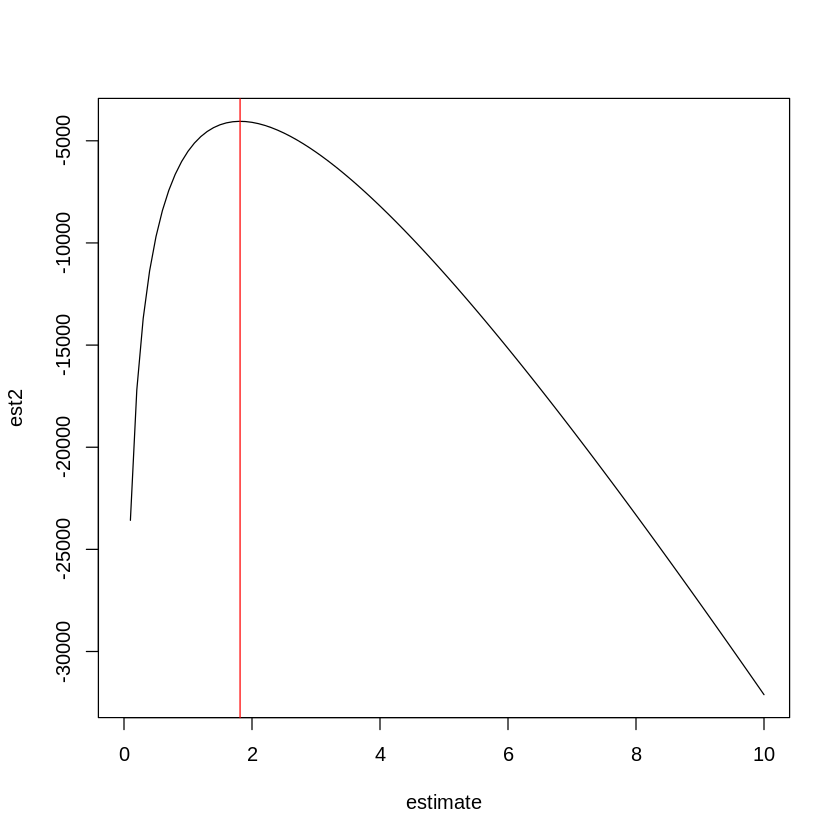

In [38]:
# log likelihood
lnlike = function(x, a){
    n = length(x)
    return(n*log(a) - a * sum(x))
}

est2 = lnlike(std, estimate)
plot(estimate, est2, type = "l")
mle2 = data.frame(estimate, est2)
mle.estimate = 1/mean(std) #length(std)/sum(std)
abline(v = mle.estimate, col = "red")
mle.optimized = optimize(f = lnlike, interval = c(0,10), x = std, maximum = T)$maximum
mle.estimate
mle.optimized

Something strange here. Why is the model giving back data that is going down rather than up? Why when sorted does the line not look a good fit, yet the estimated parameter is good? - Look at the model plotting in the miniproject r script. Get this sorted, then change this to a inverse cdf of the exponential and get it working, then apply to the data. 

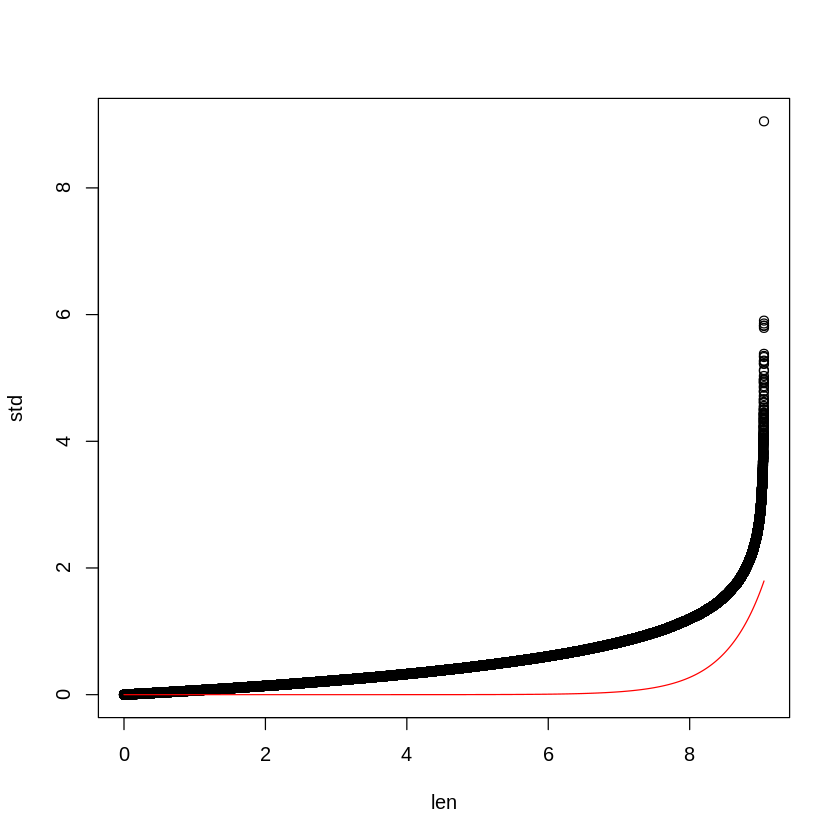

In [12]:
# show the model fit with the MLE
# why doesnt this fit?
len = seq(min(std),
          max(std),
          len = length(std))
prediction = sort(ex(len, mle.estimate))
plot(len, std)
lines(len, prediction, col = "red")

#data.frame(len, std, sort(prediction))


## CDF data
This doesn't work very well with the cdf. Not sure why, it may be the equations are off for the lok-likelihood function as we are getting just a straight line. Cant figure out why.

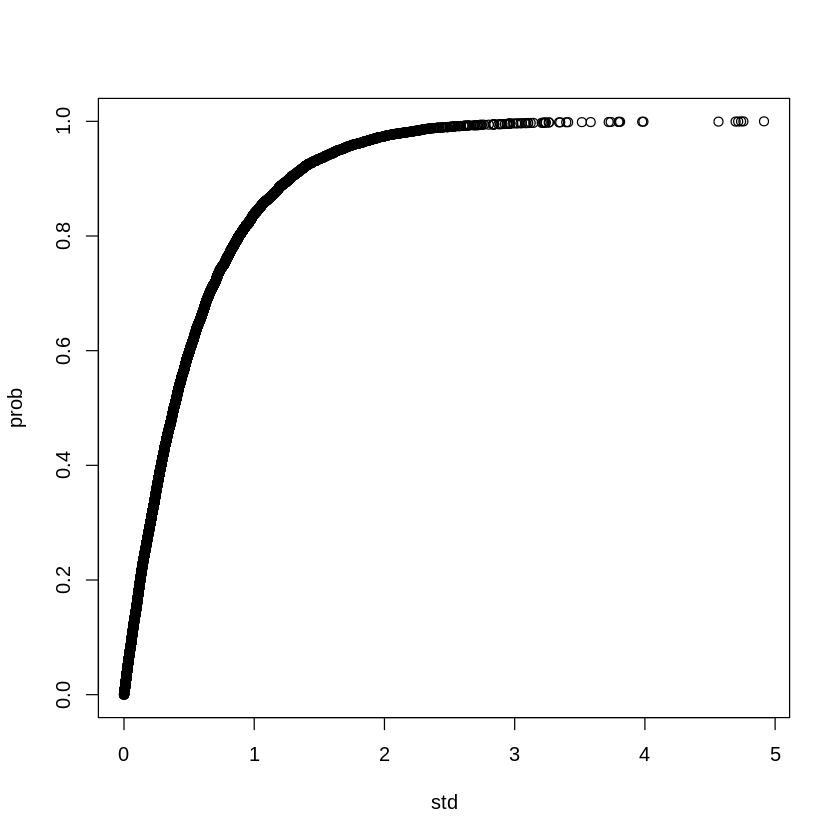

In [35]:
# exponential
ex = function(x, a){
    return(a*exp(-a*x))
}

excdf = function(x, a){
    return(1 - exp(-a * x))
}

# likelihood exp
excdf.like = function(x, a){
    return(1 - exp(-a * sum(x)))
}

# likelihood exp
excdf.loglike = function(x, a){
    return(0-(-a * sum(x)))
}

# get some data
data = rexp(10000, 1.8)
std = sort(data)
prob = seq(0, 1, length.out = length(std))
dat = data.frame(std, prob)
plot(dat)

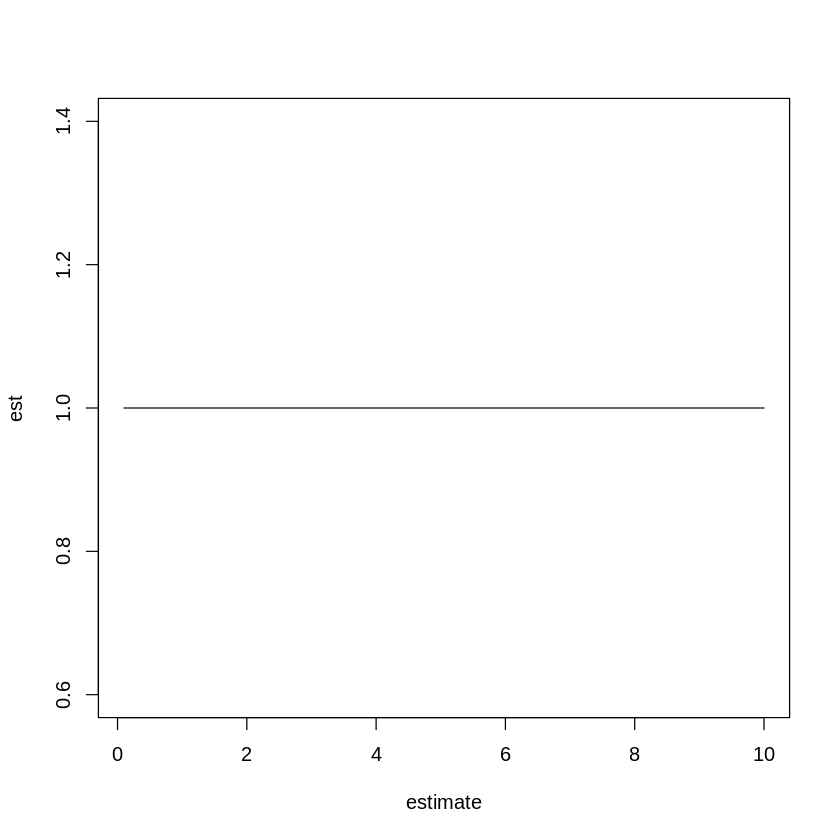

In [36]:
estimate = seq(0.1, 10, 0.1)
est = excdf.like(dat, estimate)
plot(estimate, est, type = "l")
mle = data.frame(estimate, est)
maxmle = mle$estimate[mle$est == max(mle$est)]
#abline(v = maxmle, col = "red")

Again, this gives the straight line. Either the loglikelihood function is incorect or the method of maximising it is off. I will need to check this with lecturers.

[1] 6.610696e-05

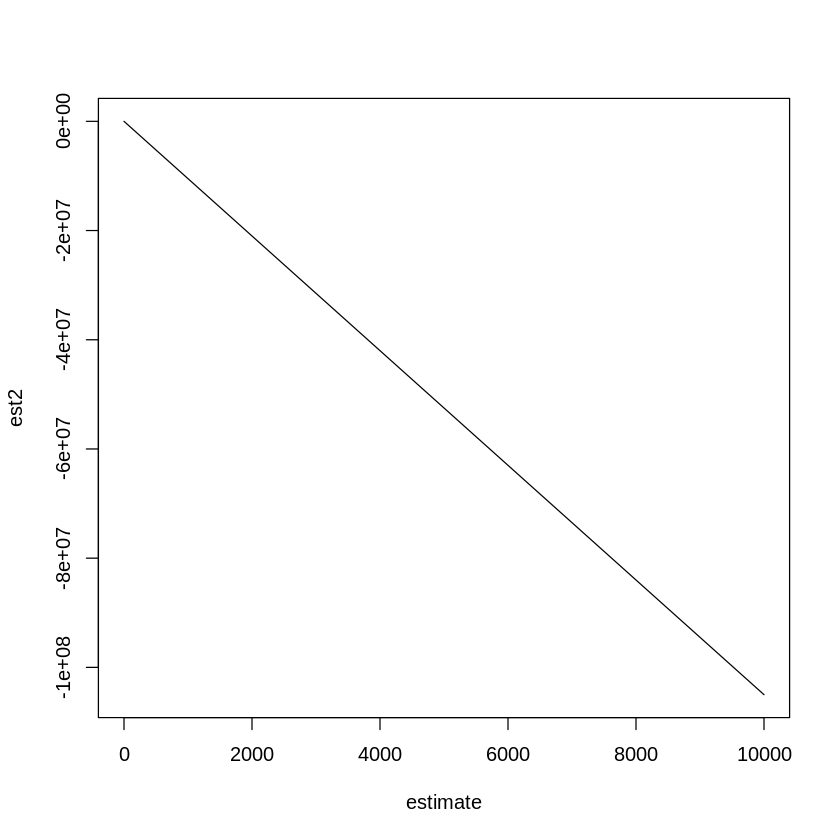

In [547]:
est2 = lnlike(dat, estimate)
plot(estimate, est2, type = "l")
mle2 = data.frame(estimate, est2)
#mle.estimate = length(dat)/sum(dat)
#abline(v = mle.estimate, col = "red")
#mle.estimate
optimize(f = lnlike, interval = c(0,1), x = std)$minimum

$minimum
[1] 19.99995

$objective
[1] 10

$minimum
[1] 0.9992797

$objective
[1] 0

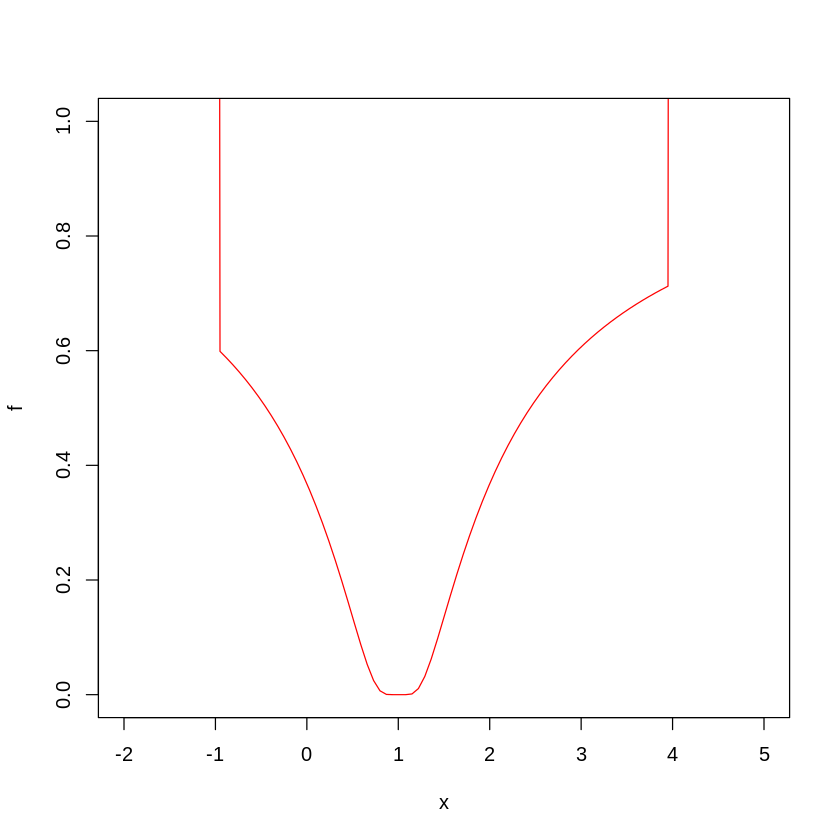

In [416]:
require(graphics)

f <- function (x, a) (x - a)^2
xmin <- optimize(f, c(0, 1), tol = 0.0001, a = 1/3)

## See where the function is evaluated:
optimize(function(x) x^2*(print(x)-1), lower = 0, upper = 10)

## "wrong" solution with unlucky interval and piecewise constant f():
f  <- function(x) ifelse(x > -1, ifelse(x < 4, exp(-1/abs(x - 1)), 10), 10)
fp <- function(x) { f(x) }

plot(f, -2,5, ylim = 0:1, col = 2)
optimize(fp, c(-4, 20))   # doesn't see the minimum
optimize(fp, c(-7, 20))   # ok